In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# from pandas_profiling import ProfileReport


In [4]:
df = pd.read_csv("IPODayOne.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GrossSpread       1300 non-null   float64
 1   MarketValue       1307 non-null   int64  
 2   OfferPrice        1307 non-null   int64  
 3   Shares_offered    1307 non-null   int64  
 4   Syndicated        1307 non-null   int64  
 5   Num_underwriters  1307 non-null   int64  
 6   Day1Perf          1307 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 71.6 KB


In [6]:
df['Day1Perf'].unique()

array([1, 2, 3], dtype=int64)

In [7]:
df.head()

,GrossSpread,MarketValue,OfferPrice,Shares_offered,Syndicated,Num_underwriters,Day1Perf
0,740600.0,672,48,1150000,0,3,1
1,16351563.0,647,18,12500000,0,10,1
2,11765149.0,475,10,23157895,0,5,1
3,877675.0,29,5,1888888,0,1,1
4,1045781.0,427,8,1875000,0,2,1


In [8]:
df.dropna(inplace = True)

In [9]:
# Summary statistics
print(df.describe())


        GrossSpread   MarketValue   OfferPrice  Shares_offered   Syndicated  \
count  1.300000e+03   1300.000000  1300.000000    1.300000e+03  1300.000000   
mean   1.456574e+07   1606.589231    15.432308    1.562001e+07     0.516154   
std    2.070995e+07   5278.464951     6.665149    3.007138e+07     0.499931   
min    3.945400e+04      3.000000     3.000000    5.250000e+05     0.000000   
25%    4.770894e+06    216.000000    11.000000    5.000000e+06     0.000000   
50%    8.640000e+06    407.000000    15.000000    8.500000e+06     1.000000   
75%    1.642802e+07   1037.000000    19.000000    1.500000e+07     1.000000   
max    2.715300e+08  89922.000000    85.000000    4.780000e+08     1.000000   

       Num_underwriters     Day1Perf  
count       1300.000000  1300.000000  
mean           5.955385     1.937692  
std            4.183752     0.836960  
min            1.000000     1.000000  
25%            3.000000     1.000000  
50%            5.000000     2.000000  
75%            

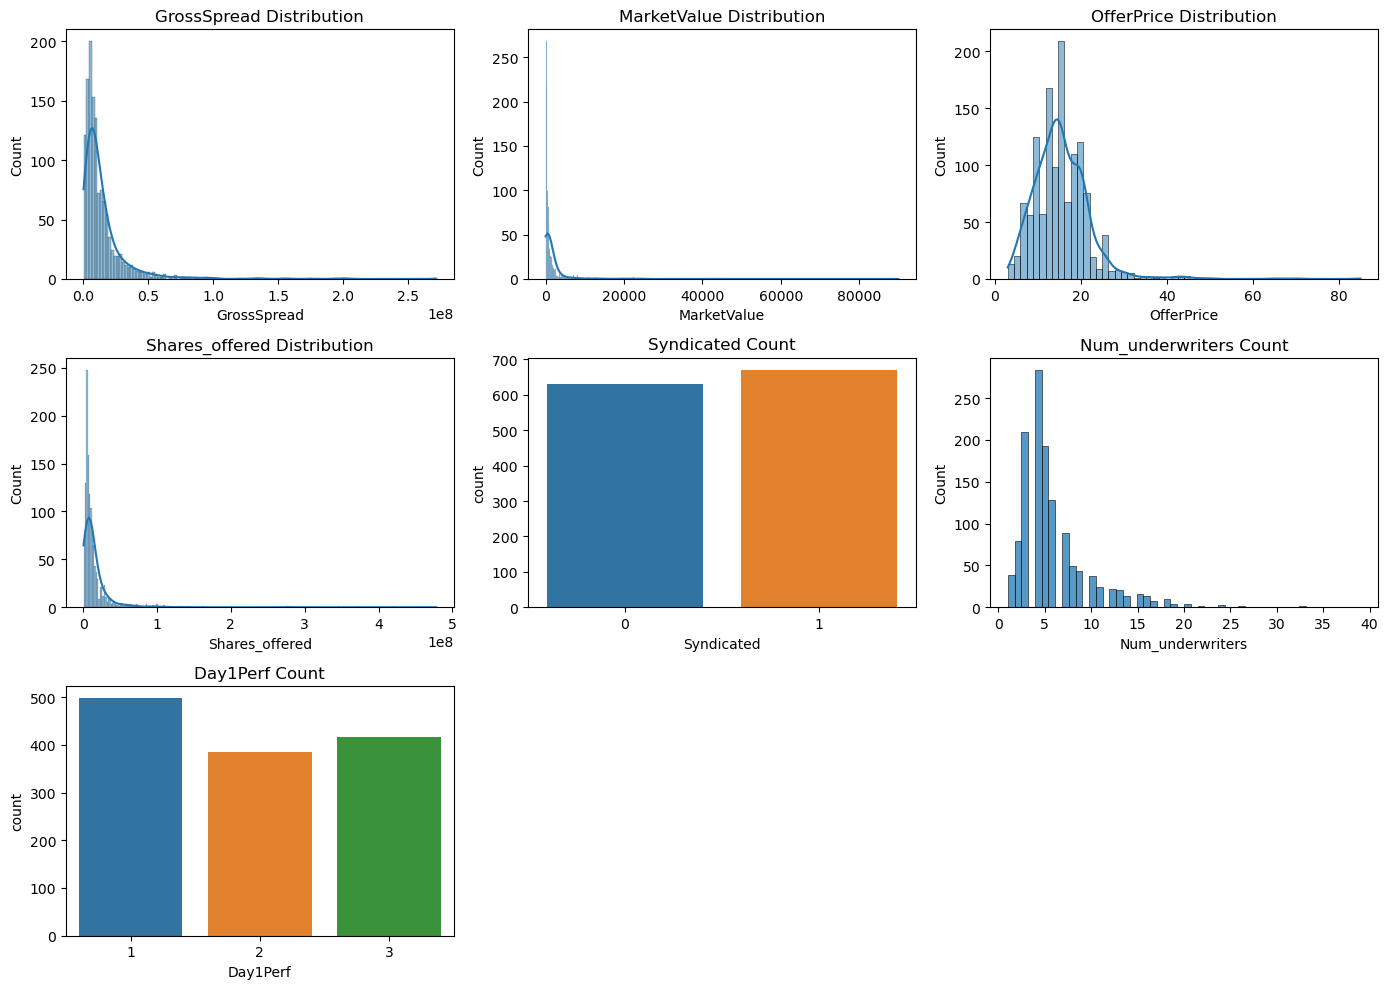

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

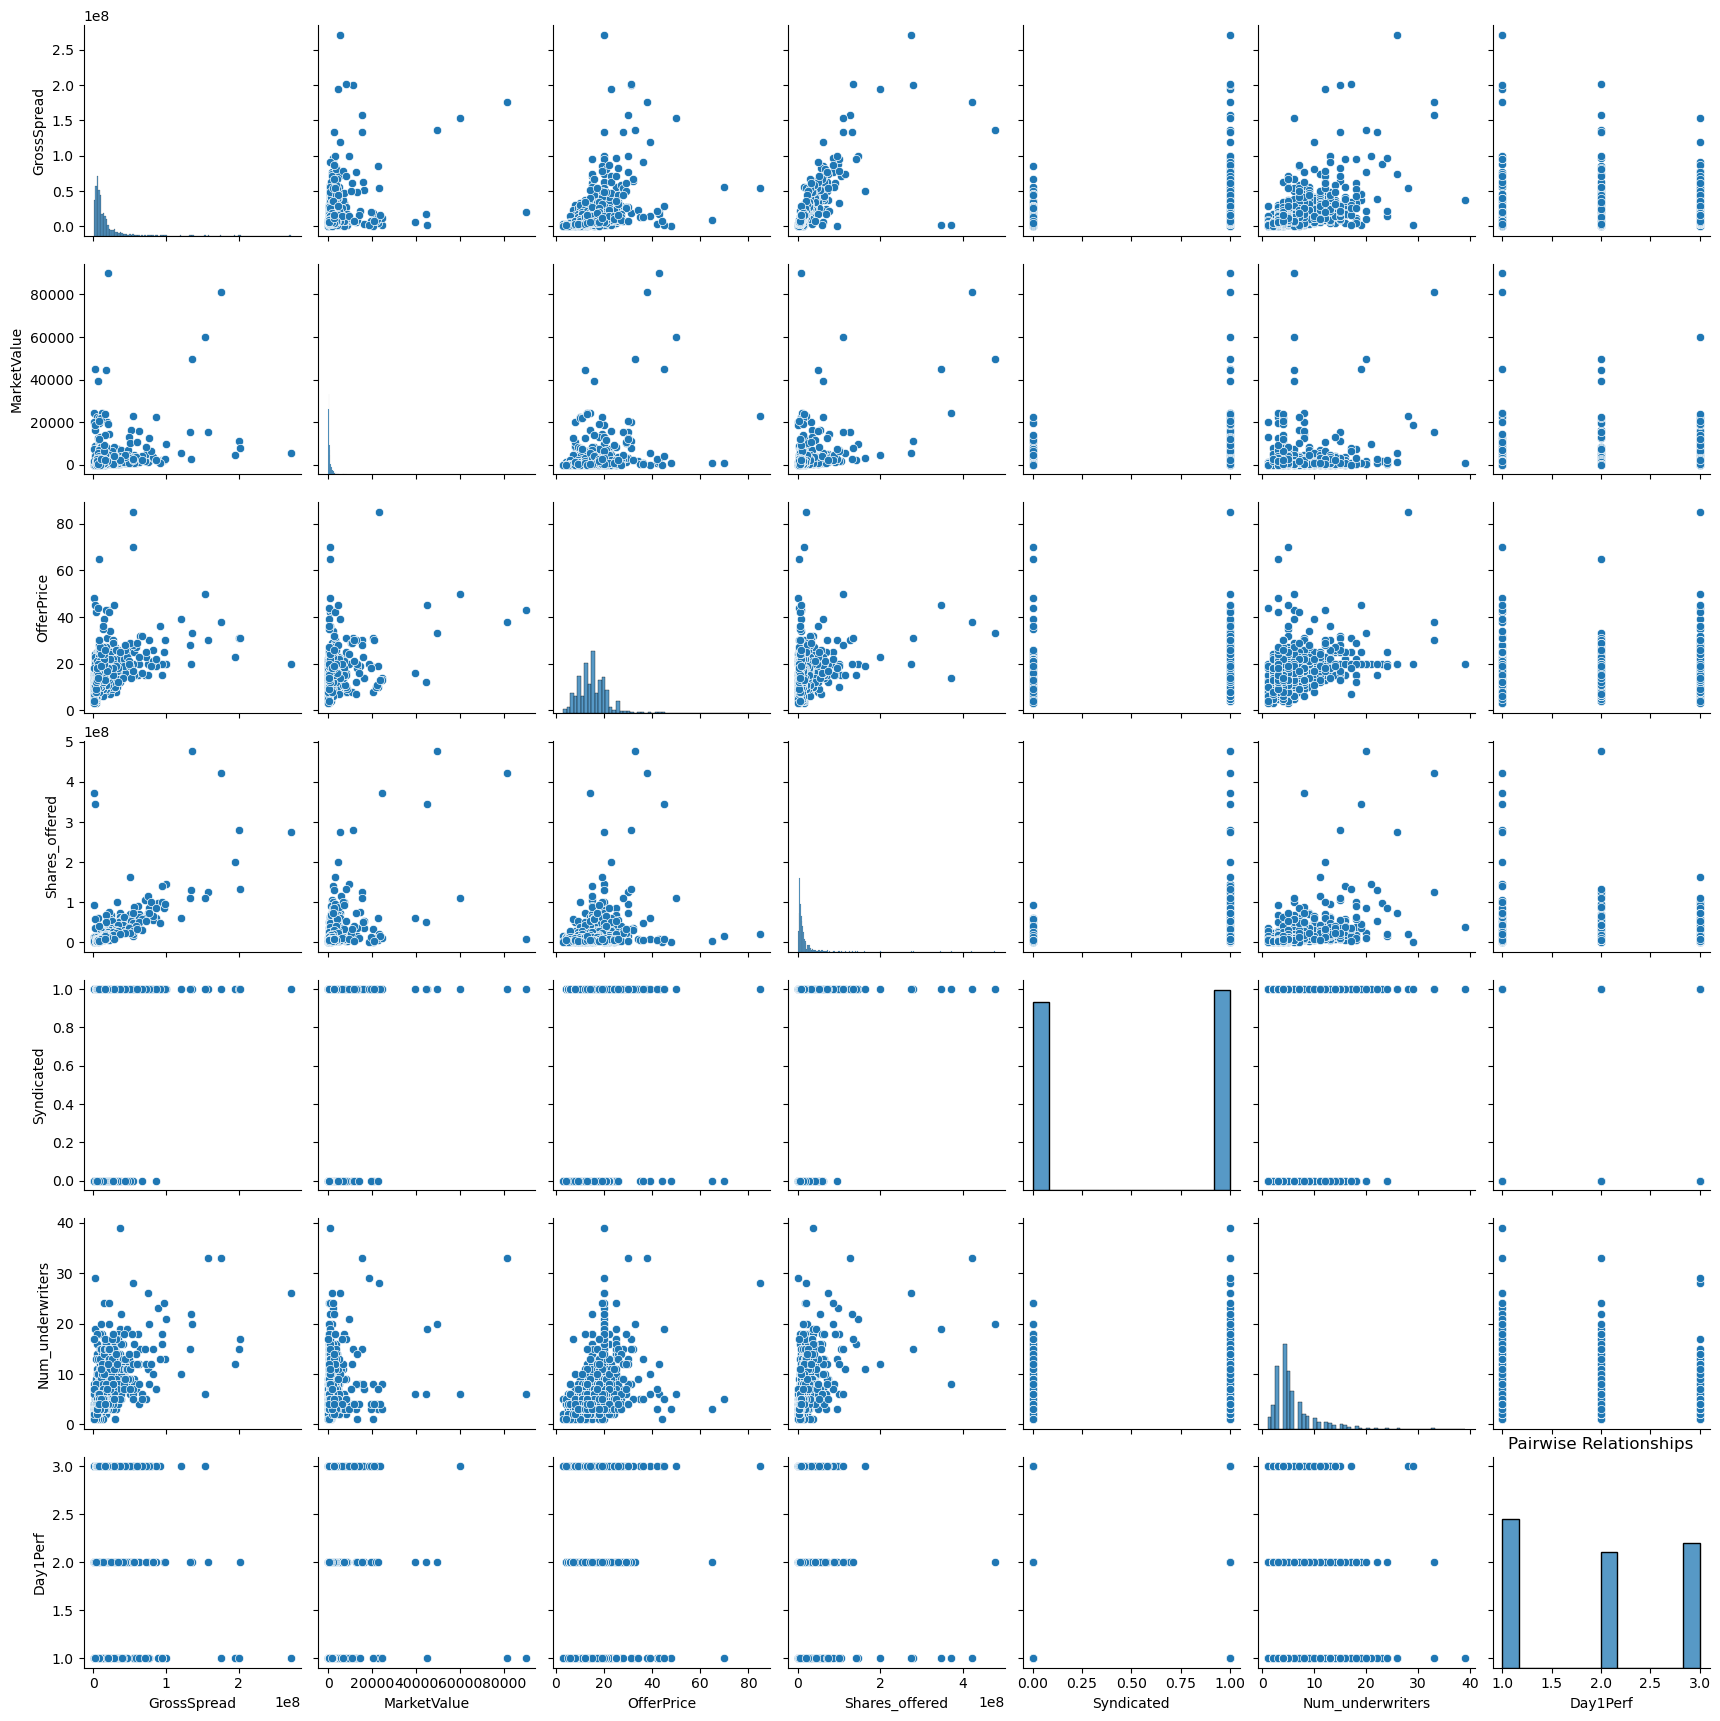

In [12]:
# Univariate analysis
plt.figure(figsize=(14, 10))

# Plot 1: Distribution of GrossSpread
plt.subplot(3, 3, 1)
sns.histplot(df['GrossSpread'], kde=True)
plt.title('GrossSpread Distribution')

# Plot 2: Distribution of MarketValue
plt.subplot(3, 3, 2)
sns.histplot(df['MarketValue'], kde=True)
plt.title('MarketValue Distribution')

# Plot 3: Distribution of OfferPrice
plt.subplot(3, 3, 3)
sns.histplot(df['OfferPrice'], kde=True)
plt.title('OfferPrice Distribution')

# Plot 4: Distribution of Shares_offered
plt.subplot(3, 3, 4)
sns.histplot(df['Shares_offered'], kde=True)
plt.title('Shares_offered Distribution')

# Plot 5: Distribution of Syndicated
plt.subplot(3, 3, 5)
sns.countplot(x='Syndicated', data=df)
plt.title('Syndicated Count')

# Plot 6: Distribution of Num_underwriters
plt.subplot(3, 3, 6)
sns.histplot(x='Num_underwriters', data=df)
plt.title('Num_underwriters Count')

# Plot 7: Distribution of Day1Perf
plt.subplot(3, 3, 7)
sns.countplot(x='Day1Perf', data=df)
plt.title('Day1Perf Count')

plt.tight_layout()
plt.show()

# Bivariate analysis
plt.figure(figsize=(12, 8))

# Plot: Pairwise relationships using pairplot
sns.pairplot(df)
plt.title('Pairwise Relationships')
plt.show()

In [7]:
def build_classification_model(data, target_column, model_choice):
    """
    Build a classification model based on the user's choice of model and print out the top 3 important features.
    
    Parameters:
        data (DataFrame): The input DataFrame.
        target_column (str): The name of the target column.
        model_choice (str): The chosen classification model 
                            ('Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'Naive Bayes', or 'XGBoost').
    
    Returns:
        dict: A dictionary containing train score, test score, confusion matrix, and predictions.
    """
    # Extract features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the chosen classification model
    if model_choice == 'Random Forest':
        model = RandomForestClassifier()
    elif model_choice == 'Decision Tree':
        model = DecisionTreeClassifier()
    elif model_choice == 'Logistic Regression':
        model = LogisticRegression()
    elif model_choice == 'SVM':
        model = SVC()
    elif model_choice == 'Naive Bayes':
        model = GaussianNB()
    elif model_choice == 'XGBoost':
        model = XGBClassifier()
    elif model_choice == 'KNN':
        model = KNeighborsClassifier()
    elif model_choice == 'AdaBoost':
        model = AdaBoostClassifier()
    elif model_choice == 'Gradient Boosting':
        model = GradientBoostingClassifier()
    elif model_choice == 'Neural Network':
        model = MLPClassifier()
    else:
        raise ValueError("Invalid model choice. Choose from 'Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'Naive Bayes', 'XGBoost', 'KNN', 'AdaBoost', 'Gradient Boosting', or 'Neural Network'.")
   
    # Train the model
    model.fit(X_train, y_train)
    
    # Get feature importance (if applicable)
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        if len(feature_importance) >= 3:
            top_features_idx = np.argsort(feature_importance)[::-1][:3]
            top_features = X.columns[top_features_idx]
            print(f"Top 3 important features affecting {target_column}:")
            for i, feature in enumerate(top_features):
                print(f"{i+1}. {feature}")
        else:
            print("Feature importance is not available for this model.")
    else:
        print("Feature importance is not available for this model.")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate train and test scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Create dictionary to store results
    results = {
        'train_score': train_score,
        'test_score': test_score,
        'confusion_matrix': conf_matrix,
        'predictions': y_pred
    }
    
    return results

In [8]:
results = build_classification_model(df, "Day1Perf", "Decision Tree")
print("Train Score:", results['train_score'])
print("Test Score:", results['test_score'])
print("Confusion Matrix:")
print(results['confusion_matrix'])
print("Predictions:")
print(results['predictions'])

Top 3 important features affecting Day1Perf:
1. MarketValue
2. GrossSpread
3. Shares_offered
Train Score: 1.0
Test Score: 0.4076923076923077
Confusion Matrix:
[[45 33 25]
 [31 24 29]
 [18 18 37]]
Predictions:
[1 2 2 3 1 1 3 1 3 3 3 3 3 3 1 1 3 3 2 1 3 3 2 3 2 2 1 3 1 2 2 1 2 1 2 3 2
 3 2 3 2 2 3 3 2 1 1 3 1 2 3 3 2 3 2 1 1 2 3 1 2 2 3 1 3 2 3 1 1 1 2 3 3 2
 1 2 3 3 2 3 2 1 1 2 1 1 2 1 1 3 1 3 1 2 3 3 2 1 3 3 2 1 3 2 3 2 3 3 1 1 1
 3 1 3 2 1 1 3 2 3 1 1 2 3 1 3 3 3 2 2 1 3 3 1 3 2 1 1 2 2 1 3 2 1 1 1 1 3
 1 2 1 3 2 1 2 1 3 1 2 2 3 3 3 2 1 3 1 1 1 3 2 1 3 2 3 3 1 1 3 3 1 3 2 3 3
 3 1 2 1 1 2 1 1 3 1 2 1 3 2 3 1 3 1 3 1 3 2 1 1 1 2 1 2 3 2 1 2 1 1 3 3 2
 3 1 2 2 1 2 3 3 2 2 2 1 3 1 3 1 3 1 3 2 3 2 2 1 3 1 1 1 2 1 3 1 2 3 1 2 1
 2]


In [9]:
results = build_classification_model(df, "Day1Perf", "Random Forest")
print("Train Score:", results['train_score'])
print("Test Score:", results['test_score'])
print("Confusion Matrix:")
print(results['confusion_matrix'])
print("Predictions:")
print(results['predictions'])

Top 3 important features affecting Day1Perf:
1. GrossSpread
2. MarketValue
3. Shares_offered
Train Score: 1.0
Test Score: 0.5076923076923077
Confusion Matrix:
[[63 23 17]
 [32 23 29]
 [14 13 46]]
Predictions:
[1 2 1 3 1 1 3 1 2 2 3 3 3 1 3 1 3 1 2 1 3 1 1 1 1 2 1 1 1 2 2 1 2 1 2 3 2
 3 3 3 3 1 2 3 2 1 2 3 1 2 3 3 1 3 1 1 1 1 3 3 3 3 3 1 3 3 1 1 2 3 3 3 3 2
 1 3 3 1 2 2 1 1 1 1 1 2 3 3 1 3 1 3 1 2 3 3 2 3 2 3 2 1 3 3 1 1 3 2 1 1 1
 1 2 3 1 1 1 1 3 3 2 3 1 3 1 1 3 1 2 2 1 3 3 1 3 2 2 3 2 2 1 1 3 3 1 1 3 2
 3 1 1 3 1 3 2 1 3 1 3 2 1 3 3 3 3 3 1 1 1 1 2 1 2 2 3 3 1 1 3 3 1 2 2 3 3
 1 1 2 1 1 2 1 1 3 1 2 3 3 2 2 1 3 1 3 1 3 3 1 2 3 1 1 2 1 1 3 2 3 1 1 3 2
 3 1 2 1 3 1 3 2 1 2 2 3 1 3 3 1 1 1 3 1 3 3 2 1 1 2 1 1 1 1 3 1 2 2 1 2 1
 2]


In [10]:
df['Day1Perf'] = df['Day1Perf']-1
results = build_classification_model(df, "Day1Perf", "XGBoost")
print("Train Score:", results['train_score'])
print("Test Score:", results['test_score'])
print("Confusion Matrix:")
print(results['confusion_matrix'])
print("Predictions:")
print(results['predictions'])

Top 3 important features affecting Day1Perf:
1. Num_underwriters
2. Shares_offered
3. Syndicated
Train Score: 1.0
Test Score: 0.46153846153846156
Confusion Matrix:
[[60 27 16]
 [30 24 30]
 [24 13 36]]
Predictions:
[0 1 0 2 0 0 2 0 1 1 2 0 2 0 2 0 2 0 1 0 2 0 0 2 0 1 0 0 0 1 1 0 1 0 1 2 1
 2 2 0 0 1 1 2 1 0 0 2 2 1 2 2 2 2 0 0 0 1 2 0 1 2 2 0 2 2 0 0 0 0 1 2 0 1
 0 2 2 0 0 1 0 0 0 0 0 1 1 0 0 2 0 0 2 1 2 2 1 0 1 1 1 0 2 2 0 0 2 1 0 0 0
 0 1 2 2 0 0 0 2 2 0 0 0 2 0 0 2 1 1 1 0 2 2 0 2 1 1 0 1 1 1 2 2 2 0 0 2 1
 2 1 0 2 0 0 1 0 2 0 2 1 0 0 2 1 2 2 0 0 0 0 2 0 1 1 2 1 2 0 2 2 0 1 1 2 2
 0 0 1 0 2 1 0 0 2 0 1 0 2 1 1 0 1 0 2 0 2 2 0 0 0 0 1 0 0 0 1 1 2 0 2 2 1
 2 2 0 0 2 0 2 1 0 1 1 0 0 2 2 0 2 0 2 2 2 2 1 0 1 1 0 0 0 0 2 0 0 2 0 1 0
 1]


In [15]:
results = build_classification_model(df, "Day1Perf", "AdaBoost")
print("Train Score:", results['train_score'])
print("Test Score:", results['test_score'])
print("Confusion Matrix:")
print(results['confusion_matrix'])
print("Predictions:")
print(results['predictions'])

Top 3 important features affecting Day1Perf:
1. GrossSpread
2. MarketValue
3. Shares_offered
Train Score: 0.5721153846153846
Test Score: 0.46923076923076923
Confusion Matrix:
[[68 15 20]
 [37 16 31]
 [21 14 38]]
Predictions:
[1 0 0 0 0 0 2 0 2 0 2 2 0 2 2 0 2 0 0 0 2 2 1 0 0 0 2 0 2 2 0 0 0 0 1 2 1
 1 2 0 0 2 0 2 2 0 2 2 1 1 1 2 0 0 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 2 2 2 0 0
 2 2 2 0 2 1 0 0 0 0 0 2 0 2 0 0 0 1 0 0 2 1 1 0 0 1 1 1 2 2 0 0 2 2 0 0 0
 2 0 0 0 0 0 0 1 2 1 2 0 1 1 0 2 1 1 0 0 0 1 2 2 0 0 0 0 1 0 0 2 2 0 0 2 2
 2 2 1 1 0 0 0 0 2 0 2 0 1 0 2 2 2 0 2 2 2 0 2 0 1 1 0 1 0 0 2 2 0 1 1 2 2
 0 0 2 0 1 2 2 1 2 0 1 0 0 1 1 0 2 0 2 0 0 2 2 2 0 0 0 0 0 0 2 0 2 0 0 2 2
 2 1 2 1 2 0 2 1 0 1 0 0 0 0 2 2 0 0 2 0 2 0 1 0 0 0 0 0 0 1 2 0 0 2 0 0 0
 1]
